<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BDL5%5D_Classifica%C3%A7%C3%A3o_de_sinais_de_tr%C3%A2nsito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 8: Classificação de sinais de trânsito

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

# Etapa 2: Importação da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

# Etapa 3: Visualização dos dados

1

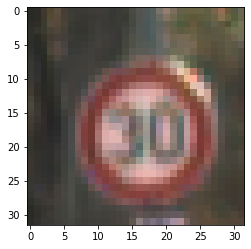

In [ ]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

1

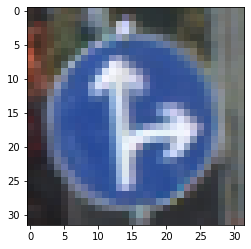

In [ ]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

23

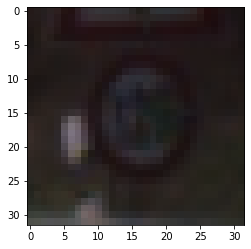

In [ ]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4: Preparação dos dados

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [ ]:
np.max(X_train_gray_norm)

0.9921875

In [ ]:
np.min(X_train_gray_norm)

-0.9713541666666666

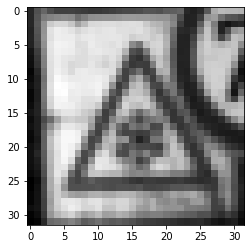

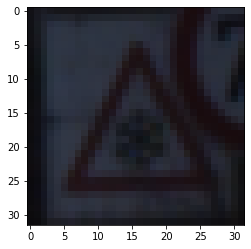

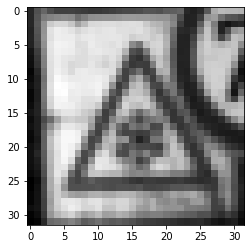

In [ ]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

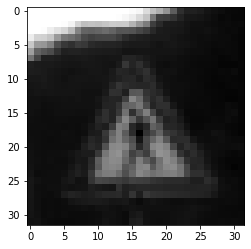

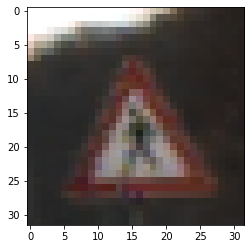

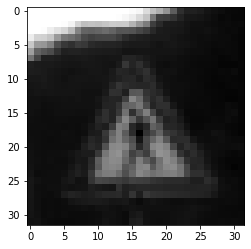

In [ ]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

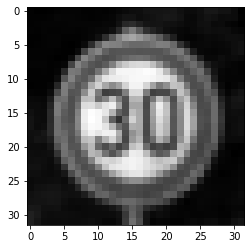

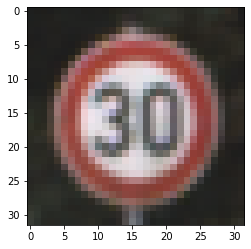

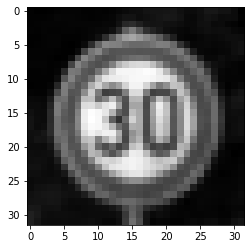

In [ ]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Etapa 5: Criação do modelo e treinamento

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 1s 21us/sample - loss: 3.2622 - accuracy: 0.1449 - val_loss: 2.9195 - val_accuracy: 0.2760
Epoch 2/50
34799/34799 [==============================] - 0s 13us/sample - loss: 1.8160 - accuracy: 0.5004 - val_loss: 1.5543 - val_accuracy: 0.5610
Epoch 3/50
34799/34799 [==============================] - 0s 14us/sample - loss: 1.0025 - accuracy: 0.7097 - val_loss: 1.0055 - val_accuracy: 0.7247
Epoch 4/50
34799/34799 [==============================] - 0s 14us/sample - loss: 0.7201 - accuracy: 0.7980 - val_loss: 0.8420 - val_accuracy: 0.7458
Epoch 5/50
34799/34799 [==============================] - 0s 13us/sample - loss: 0.5656 - accuracy: 0.8445 - val_loss: 0.7721 - val_accuracy: 0.7787
Epoch 6/50
34799/34799 [==============================] - 0s 13us/sample - loss: 0.4763 - accuracy: 0.8687 - val_loss: 0.7193 - val_accuracy: 0.7982
Epoch 7/50
34799/34799 [==============================] -

# Etapa 6: Avaliação do modelo

In [ ]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 81us/sample - loss: 1.1308 - accuracy: 0.8683
Test Accuracy: 0.8682501912117004


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_accuracy

[0.27596372,
 0.5609977,
 0.72471654,
 0.74580497,
 0.7786848,
 0.79818594,
 0.7984127,
 0.80453515,
 0.815873,
 0.8365079,
 0.84217685,
 0.837415,
 0.853288,
 0.8526077,
 0.84875286,
 0.8417234,
 0.8494331,
 0.85714287,
 0.84875286,
 0.844898,
 0.8489796,
 0.85555553,
 0.86145127,
 0.85056686,
 0.8634921,
 0.8646259,
 0.84126985,
 0.85918367,
 0.8639456,
 0.85668933,
 0.8668934,
 0.86099774,
 0.85555553,
 0.85510206,
 0.86190474,
 0.8709751,
 0.86326534,
 0.8761905,
 0.85283446,
 0.8675737,
 0.85056686,
 0.86145127,
 0.85918367,
 0.86213154,
 0.85895693,
 0.8659864,
 0.85374147,
 0.860771,
 0.8648526,
 0.8637188]

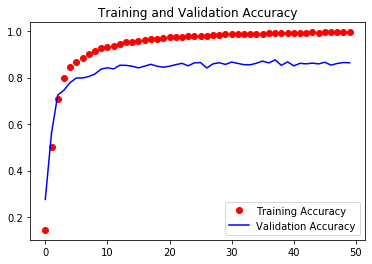

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

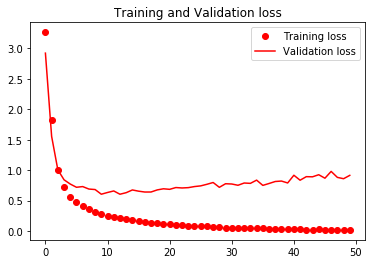

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [ ]:
#predicted_classes = LeNet.predict_classes(X_test_gray_norm) -- Atualizado 17/01/22
#y_true = y_test

In [ ]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

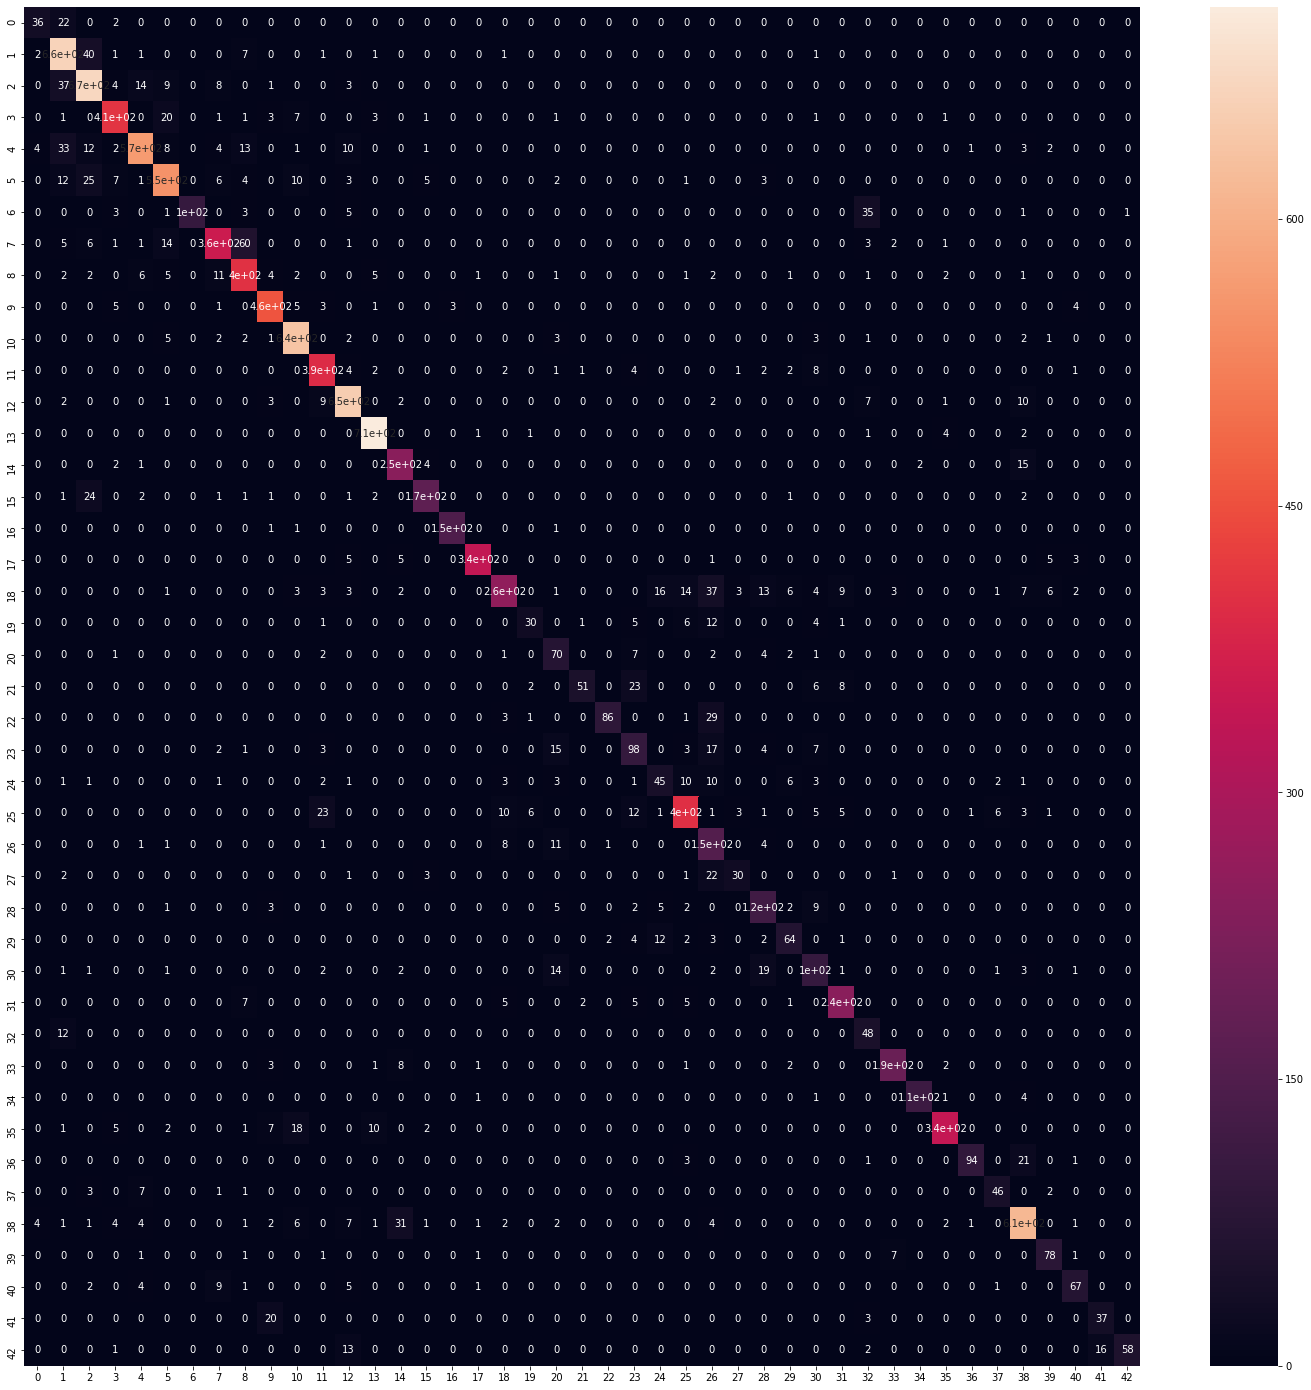

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

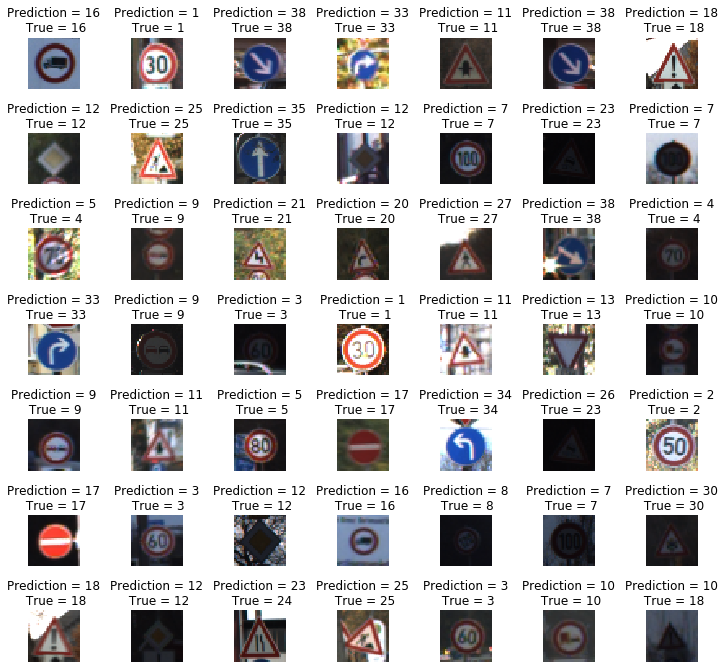

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    